<a href="https://colab.research.google.com/github/Sprt6I/pytorch-Tutorial/blob/main/NEXT_02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_circles

In [94]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [95]:
X, y = make_circles(1000, noise=0.03, random_state=42)

In [96]:
X[:5], "  ", y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 '  ',
 array([1, 1, 1, 1, 0]))

In [97]:
circlesDF = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "labels": y})
circlesDF

,X1,X2,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


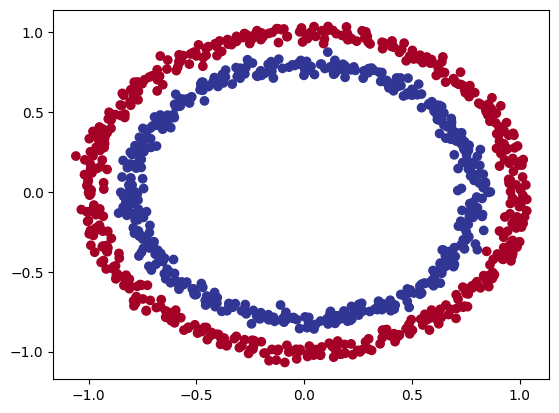

In [98]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [99]:
X = torch.from_numpy(X)
y = torch.from_numpy(y)

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [101]:
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [102]:
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

X_train = X_train.type(torch.float)
y_train=y_train.type(torch.float)
X_test=X_test.type(torch.float)
y_test=y_test.type(torch.float)

# Create Model

In [170]:
class ClassModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(in_features=2, out_features=10),
      nn.ReLU(),
      nn.Linear(in_features=10, out_features=10),
      nn.ReLU(),
      nn.Linear(in_features=10, out_features=1),
    ).to(device)

  def forward(self, inp:torch.Tensor) -> torch.Tensor:
    return self.layers(inp)

In [171]:
model = ClassModel().to(device)

### Loss FN and Optimizer

In [172]:
loss_fn = nn.BCEWithLogitsLoss()

optim = torch.optim.SGD(lr=0.1, momentum=0.9, params=model.parameters())

In [173]:
# Use sigmoid on model logits (bo tak)
y_logits = model(X_test.type(torch.float))[:5]
y_pred_probs = torch.sigmoid(y_logits)

In [174]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model(X_test)[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1.], grad_fn=<SqueezeBackward0>)

# Train Loop

In [178]:
torch.manual_seed(42)

epochs = 2_501

for epoch in range(epochs):
    model.train()

    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)

    optim.zero_grad()

    loss.backward()

    optim.step()

    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Test loss: {test_loss:.5f}")

Epoch: 0 | Test loss: 0.01086
Epoch: 100 | Test loss: 0.01073
Epoch: 200 | Test loss: 0.01062
Epoch: 300 | Test loss: 0.01051
Epoch: 400 | Test loss: 0.01041
Epoch: 500 | Test loss: 0.01032
Epoch: 600 | Test loss: 0.01024
Epoch: 700 | Test loss: 0.01017
Epoch: 800 | Test loss: 0.01009
Epoch: 900 | Test loss: 0.01003
Epoch: 1000 | Test loss: 0.00997
Epoch: 1100 | Test loss: 0.00991
Epoch: 1200 | Test loss: 0.00986
Epoch: 1300 | Test loss: 0.00981
Epoch: 1400 | Test loss: 0.00976
Epoch: 1500 | Test loss: 0.00971
Epoch: 1600 | Test loss: 0.00967
Epoch: 1700 | Test loss: 0.00963
Epoch: 1800 | Test loss: 0.00959
Epoch: 1900 | Test loss: 0.00956
Epoch: 2000 | Test loss: 0.00952
Epoch: 2100 | Test loss: 0.00949
Epoch: 2200 | Test loss: 0.00946
Epoch: 2300 | Test loss: 0.00944
Epoch: 2400 | Test loss: 0.00941
Epoch: 2500 | Test loss: 0.00938


In [179]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


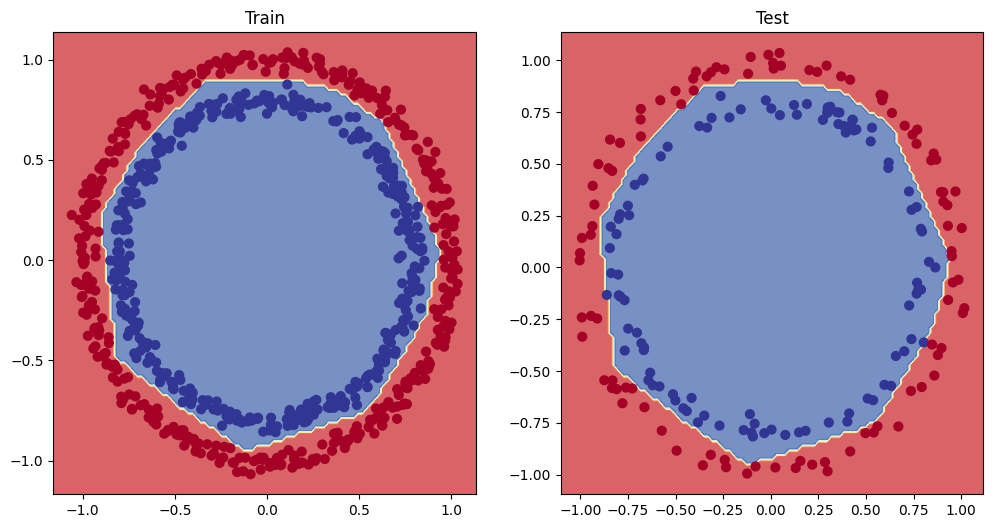

In [180]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)

plt.title('Train')
plot_decision_boundary(model, X_train, y_train)

plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model,X_test,y_test)
